In [10]:
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats
from scipy import optimize
from scipy.stats import norm
from scipy.stats import uniform

from astroML import stats as astroMLstats
from astropy.visualization.hist import hist as fancyhist

from sklearn.neighbors import KernelDensity

import emcee
#import pymc3
import corner

#import dynesty

import sklearn
from sklearn import manifold
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import MeanShift

# Dimensional reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA

# Regression
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
from astroML.linear_model import BasisFunctionRegression
from astroML.linear_model import NadarayaWatson

# Cross-Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve

## Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

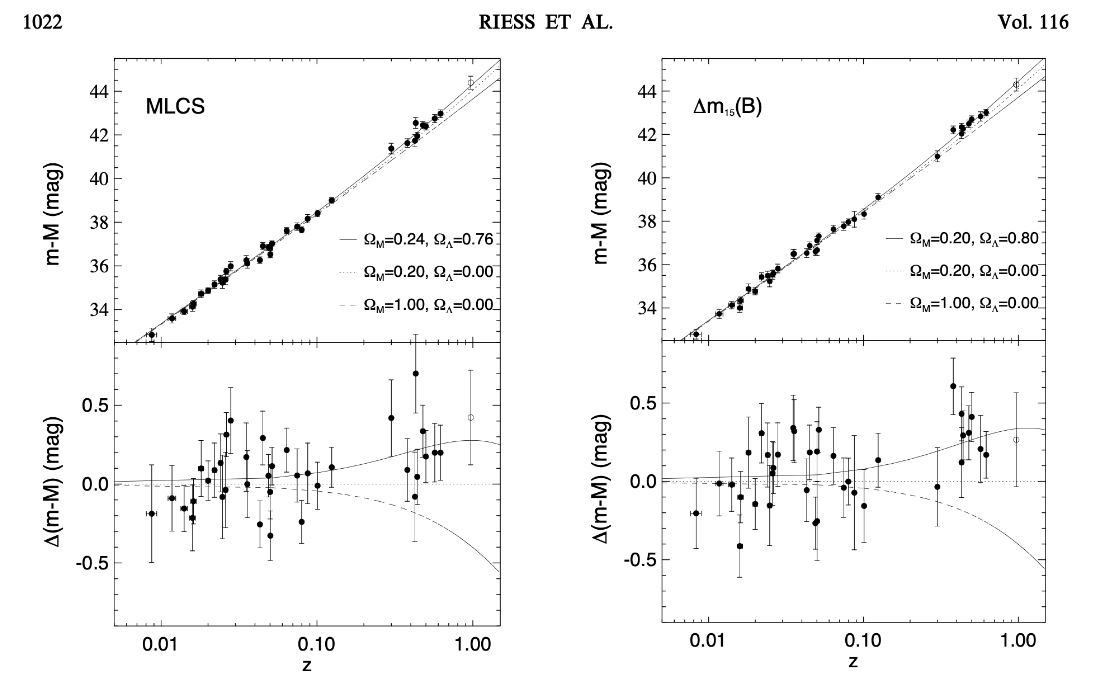

These are some (synthetic but realistic; see textbook) supernova data

(35.0, 50.0)

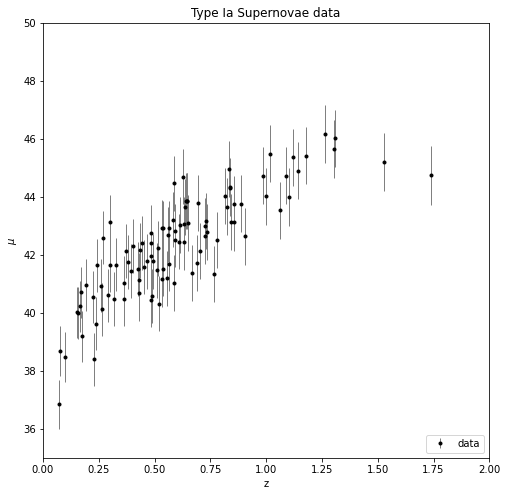

In [6]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

fig = plt.figure(figsize=(8,8))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title('Type Ia Supernovae data')
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

###  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Implement the cross-validation error function
- Compute the cross-validation error for each model
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

### Linear regression

In [48]:
# put the data in the correct format for sklearn:

X = z_sample[:,np.newaxis]
y = mu_sample[:,np.newaxis]
dy = dmu

[39.60456481] [[4.5911933]]


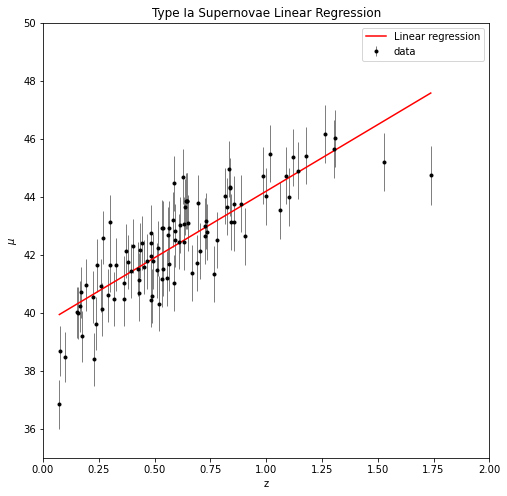

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X, y, sample_weight=dy)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)

X_grid = np.linspace(z_sample.min(),z_sample.max(),1000)[:,np.newaxis]
y_pred = lin_reg.predict(X_grid)

fig = plt.figure(figsize=(8,8))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(X_grid,y_pred,color='r',label='Linear regression')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.title('Type Ia Supernovae Linear Regression')
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend()

### Polinomial regression

In [50]:
# put the data in the correct format for astroML:

X = z_sample[:,np.newaxis]
y = mu_sample
dy = dmu

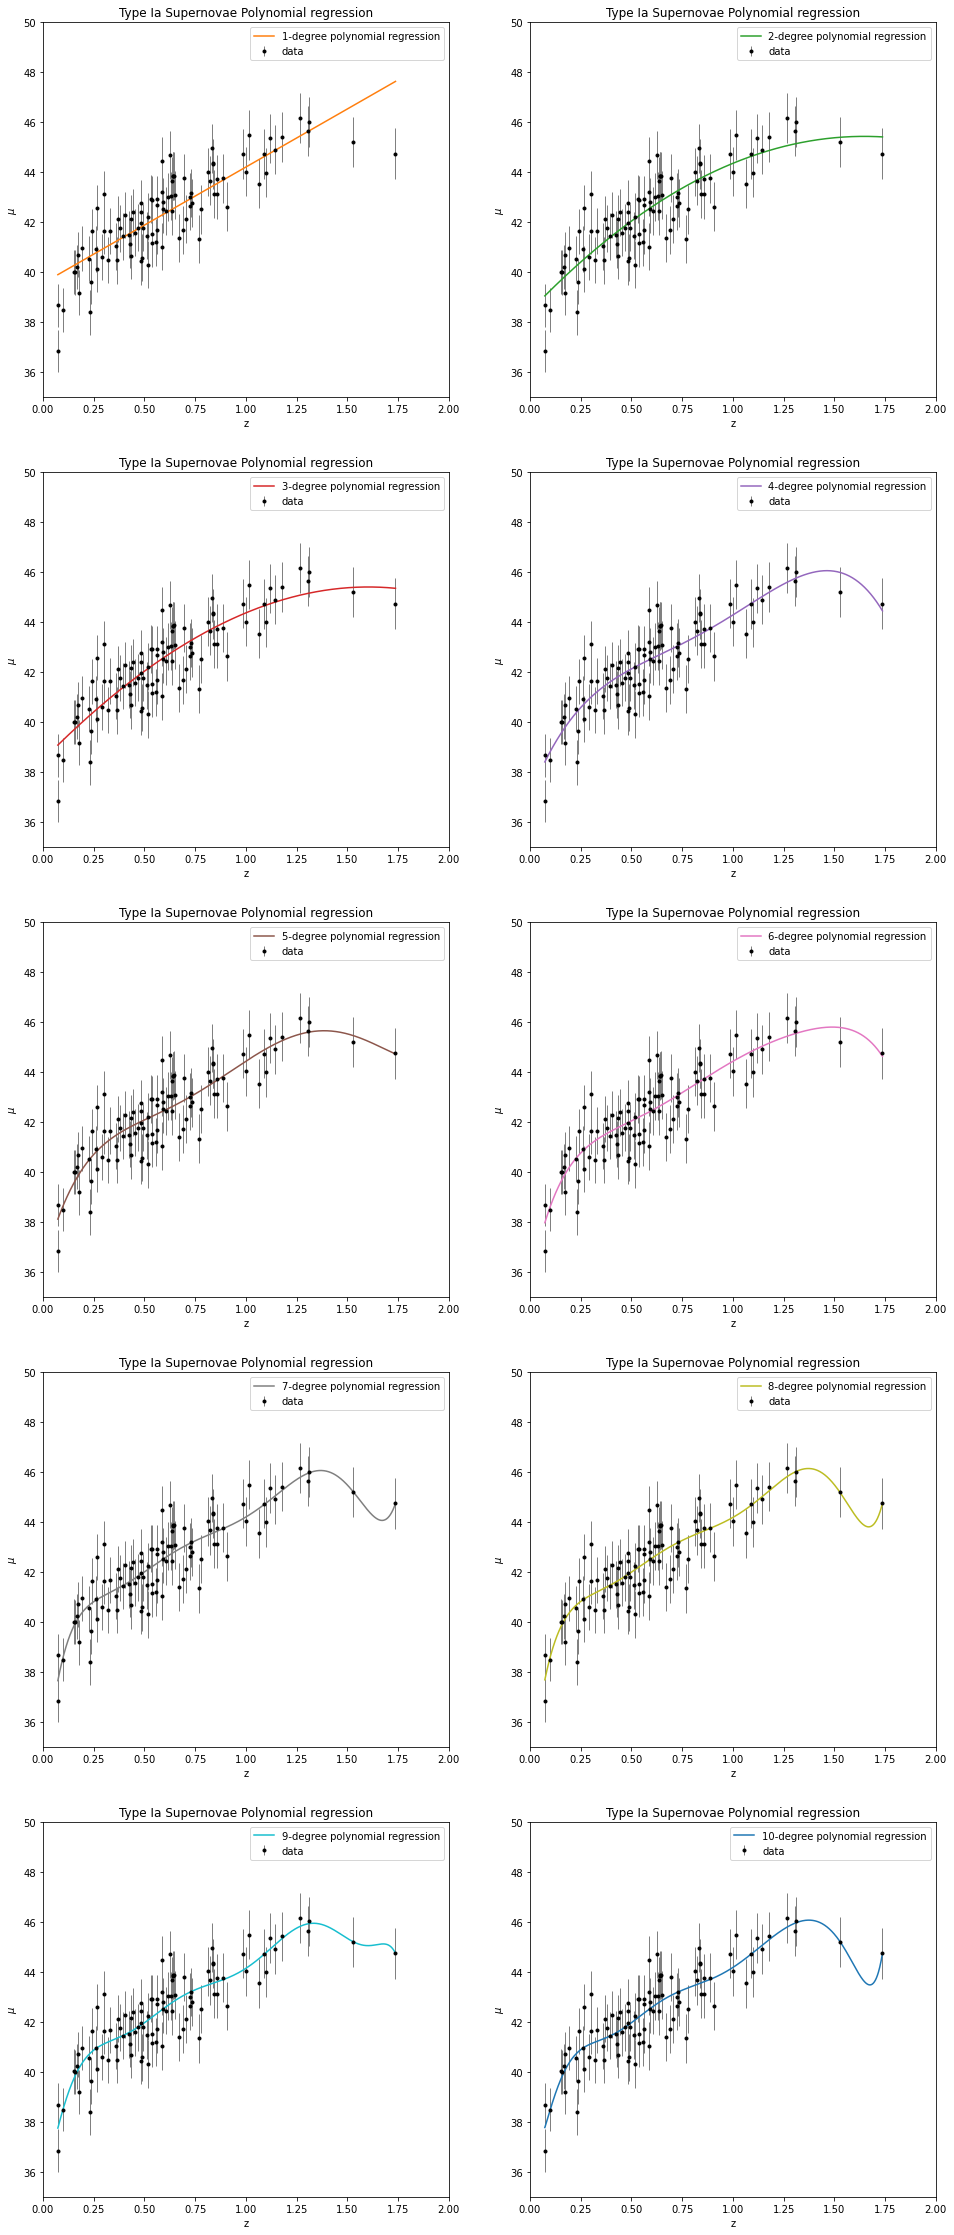

In [54]:
n_degree = np.arange(1,11)

ncols=2
nrows=5

fig,axis = plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*8,nrows*8))

for n,ax in zip(n_degree,axis.flatten()):
    model = PolynomialRegression(n)
    model.fit(X,y)
    y_pred = model.predict(X_grid)
    
    ax.plot(X_grid,y_pred,label='%i-degree polynomial regression'%n,color='C%i'%n)
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
    ax.set_xlabel("z")
    ax.set_ylabel("$\mu$")
    ax.set_title('Type Ia Supernovae Polynomial regression')
    ax.legend(loc='lower right')
    ax.set_xlim(0,2)
    ax.set_ylim(35,50)
    ax.legend()


In [ ]:
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(Xtest, ytest)

y_pred = model.predict(Xtest)
n_constraints = degree + 1

print(model.coef_)